In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

In [25]:
df = pd.read_csv('./GE2_datasets/heart_disease_health_indicators_BRFSS2015.csv')
print("heart_disease_health 資料集:")
df.head()

heart_disease_health 資料集:


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Model training

In [26]:
# split data 
X = df.drop('HeartDiseaseorAttack', axis=1) # 特徵
y = df['HeartDiseaseorAttack'] # 目標

# train: 70%, test: 30%, random state: 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 訓練模型
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# 進行預測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 評估模型
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'訓練準確度: {train_accuracy:.4f}')
print(f'測試準確度: {test_accuracy:.4f}')

訓練準確度: 0.9070
測試準確度: 0.9059


/Users/karlynli/anaconda3/envs/BDAR_Final_Project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Youden's J index

In [27]:
# 預測
y_prob = model.predict_proba(X_test)[:, 1]

# 計算不同截斷值下的靈敏度和特異度
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 計算Youden's J指數
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]

# 計算模型在不同截斷值下的真正例率（靈敏度）
index_default = np.argmin(np.abs(thresholds - 0.5))
sensitivity_default = tpr[index_default] if index_default < len(tpr) else tpr[-1]

index_optimal = np.argmax(youden_index)
sensitivity_optimal = tpr[index_optimal] if index_optimal < len(tpr) else tpr[-1]

# 印出結果
print(f'Youden\'s J指數最優截斷值: {optimal_threshold:.4f}')
print(f'模型在截斷值為0.5時的真正例率（靈敏度）: {sensitivity_default:.4f}')
print(f'模型在最優截斷值時的真正例率（靈敏度）: {sensitivity_optimal:.4f}')


Youden's J指數最優截斷值: 0.0885
模型在截斷值為0.5時的真正例率（靈敏度）: 0.1170
模型在最優截斷值時的真正例率（靈敏度）: 0.8186


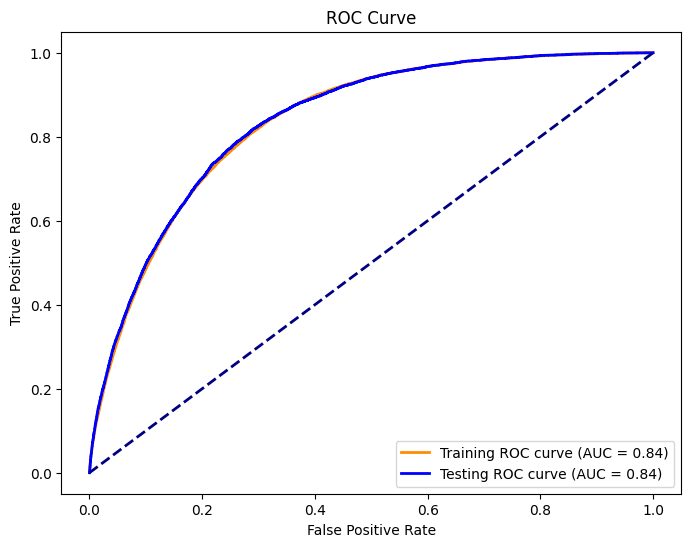

In [31]:
y_train_prob = model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Testing ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()